# How to calculate Happiness
We have created a function, which can be used to calculate the happiness of an agent. This Jupyter Notebook shows, how our function looks like and how it can be used.

In [ ]:
# import some needed libraries, in this case only numpy for calculations and motplotlib for some graphs
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

The idea of our function is based on the distances between the wanted and actual outcome of an election. The distance is calculated using the absolute difference of the wanted outcome $j$ and actual outcome $i$. 

$$d = \sum^m_l|j - i|$$

We assume, that we have $m$ votes in our election, which is why we wanted to weighten the first votes more, as well as the very last ones. In our opinion, the first votes of an election are more important, than some votes in the middle. The same can usually be applied to the last votes. In order to weighten the distances, we used a discounting factor $\lambda\in[0; 1]$ which gets lower with every vote $l$ of all votes $m$.

$$\lambda_l = s^{l^2}$$

For example, a curve could look like the following one, in the case we set our $s=0.9$ and have $m=10$ votes.

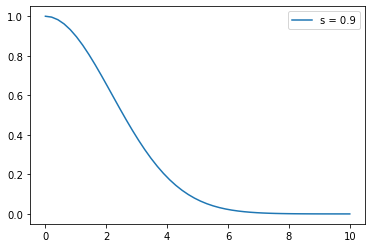

In [ ]:
# short illustration of the equation lambda above
x = np.linspace(0, 10)
y = np.power(0.9, x*x)
plt.plot(x, y)
plt.legend(["s = 0.9"])
plt.show()

But, as we discussed earlier, we want the discounting factor $\lambda$ to raise again until the end, so the last votes are as important as the first ones. To achieve this, we use the amount of votes $m$ and modify the previous equation.

$$\lambda_l = s^{l^2} + s^{(m - l)^2}$$

This results then in a curve, which looks like the following one.

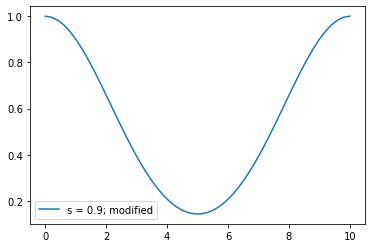

In [ ]:
# short illustration of the equation lambda above
x = np.linspace(0, 10)
y1 = np.power(0.9, x**2)
y2 = np.power(0.9, (10 - x)**2)
y = y1 + y2

plt.plot(x, y)
plt.legend(["s = 0.9; modified"])
plt.show()

If we put everything we know together, we end up with an equation, that defines the sum of distances, but considers the importance of each one.

$$\hat{h} = \sum^m_l |j - l| * (s^{l^2} + s^{(m-l)^2})$$

Because we sum over every vote $l$ in $m$, our equation $\hat{h}$ gets bigger with the amount of votes. To avoid this, we normalize the term by dividing by $m$. Anyways, the result of our term can get big, if the overall difference is big too. In order to map our happiness value into a range of $h\in[0; 1]$, we added the term

$$e^{-\hat{h}/m}$$

to our equation. The following curve indicates, how the values are clipped into the range of $[0; 1]$.

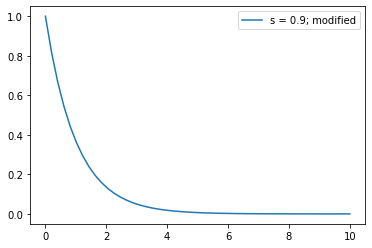

In [ ]:
x = np.linspace(0, 10)
y = np.exp(-x)

plt.plot(x, y)
plt.legend(["s = 0.9; modified"])
plt.show()

In [ ]:
# our happiness function in python
def func(i: np.array, j: np.array, s: float=0.9) -> float:
    m = len(i)
    s1 = np.power([s for l in range(m)], np.power(range(m), 2))
    s2 = np.power([s for l in range(m)], np.power(m - np.array(range(m)), 2))
    d = np.abs(j - i)
    h_hat = np.sum(d * (s1 + s2)) / m
    return np.exp(-h_hat)

## Case 1: Perfect match
In a perfect match, our agent should be very happy and therefore the happiness value should be 1.

In [ ]:
voted = np.array(range(1, 7))
outcome = np.array(range(1, 7))

func(outcome, voted, 0.9)

1.0

## Case 2: Symmetry of outcome
Here we test the case in which two elections (outcomes) are similar. The only difference is, that one outcome is fliped.

In [ ]:
voted = np.array([4, 5, 2, 1, 3, 6])
outcome = np.array(range(1, 7))

func(outcome, voted, 0.9)

0.1644283119137785

In [ ]:
voted = 7 - np.array([4, 5, 2, 1, 3, 6])
outcome = np.array(range(1, 7))

func(outcome, voted, 0.9)

0.16046988801962947

As imagined, both happiness values are really close to each other.

## Case 3: Worst case
The worst case shows the happiness of an agent in the case everything went bad. In this case the happiness should be near 0.

In [ ]:
voted = np.array([range(6, 0, -1)])
outcome = np.array(range(1, 7))

func(outcome, voted, 0.9)

0.058548396651784684

The happiness is not exactly 0, because the middle values in the outcome are as wanted and voted. Only the most important votes are not represented in the outcome.